## Libraries

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


## Understanding the Dataset

### Loading the Dataset

In [25]:
data = pd.read_csv('../Data/dataset_churn.csv')

data.head()

,Unnamed: 0,CustomerID,Age,Gender,Tenure,Service_Internet,Service_Phone,Service_TV,Contract,PaymentMethod,MonthlyCharges,TotalCharges,StreamingMovies,StreamingMusic,OnlineSecurity,TechSupport,Churn
0,0,08729464-bde6-43bc-8f63-a357096feab1,56.0,Male,13,DSL,Yes,No,One year,Mailed check,71.88,931.49,No,No,Yes,No,No
1,1,af95bc95-baf4-4318-a21d-70d2ea3148b7,69.0,Male,13,DSL,No,Yes,Two year,Mailed check,110.99,1448.46,Yes,Yes,No,No,No
2,2,1fe7eee6-2227-4400-9998-4d993f4a60fd,46.0,Male,60,Fiber optic,No,Yes,Month-to-month,Mailed check,116.74,6997.73,Yes,Yes,No,No,No
3,3,f736fe7b-1b44-4acd-84c2-21c4aef648be,32.0,Female,57,Fiber optic,Yes,Yes,Month-to-month,Bank transfer,78.16,4452.13,No,Yes,No,Yes,No
4,4,4b40d12d-7633-4309-96b8-aee675ea20ae,60.0,Male,52,Fiber optic,Yes,Yes,Two year,Electronic check,30.33,1569.73,Yes,No,Yes,Yes,No


In [27]:
# removing the index column from the dataset.
data = data.drop('Unnamed: 0', axis=1)
data = data.drop('CustomerID', axis=1)

### Understanding the Dataset.

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3749 entries, 0 to 3748
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               3562 non-null   float64
 1   Gender            3749 non-null   object 
 2   Tenure            3749 non-null   int64  
 3   Service_Internet  3028 non-null   object 
 4   Service_Phone     3749 non-null   object 
 5   Service_TV        3749 non-null   object 
 6   Contract          3749 non-null   object 
 7   PaymentMethod     3562 non-null   object 
 8   MonthlyCharges    3749 non-null   float64
 9   TotalCharges      3749 non-null   float64
 10  StreamingMovies   3749 non-null   object 
 11  StreamingMusic    3749 non-null   object 
 12  OnlineSecurity    3749 non-null   object 
 13  TechSupport       3749 non-null   object 
 14  Churn             3749 non-null   object 
dtypes: float64(3), int64(1), object(11)
memory usage: 439.5+ KB


In [29]:
# Describe each feature
for column in data.columns:
    print(f"Feature: {column}")
    print(data[column].value_counts() if data[column].dtype == 'object' else data[column].describe())
    print("\n")


Feature: Age
count    3562.000000
mean       43.655531
std        14.914474
min        18.000000
25%        31.000000
50%        44.000000
75%        56.000000
max        69.000000
Name: Age, dtype: float64


Feature: Gender
Gender
Male      1895
Female    1854
Name: count, dtype: int64


Feature: Tenure
count    3749.000000
mean       36.264070
std        20.505528
min         1.000000
25%        19.000000
50%        36.000000
75%        54.000000
max        71.000000
Name: Tenure, dtype: float64


Feature: Service_Internet
Service_Internet
Fiber optic    1908
DSL            1120
Name: count, dtype: int64


Feature: Service_Phone
Service_Phone
Yes    2621
No     1128
Name: count, dtype: int64


Feature: Service_TV
Service_TV
Yes    2188
No     1561
Name: count, dtype: int64


Feature: Contract
Contract
Month-to-month    2183
Two year           792
One year           774
Name: count, dtype: int64


Feature: PaymentMethod
PaymentMethod
Electronic check    1400
Bank transfer        742
M

In [30]:
data.describe()

,Age,Tenure,MonthlyCharges,TotalCharges
count,3562.000000,3749.000000,3749.000000,3749.000000
mean,43.655531,36.264070,75.844318,2718.968266
std,14.914474,20.505528,73.062971,3211.879149
min,18.000000,1.000000,20.000000,13.190000
25%,31.000000,19.000000,44.570000,1076.240000
50%,44.000000,36.000000,69.590000,2132.260000
75%,56.000000,54.000000,95.540000,3619.710000
max,69.000000,71.000000,1179.300000,79951.800000


In [31]:
# Checking for missing values
data.isnull().sum()

Age                 187
Gender                0
Tenure                0
Service_Internet    721
Service_Phone         0
Service_TV            0
Contract              0
PaymentMethod       187
MonthlyCharges        0
TotalCharges          0
StreamingMovies       0
StreamingMusic        0
OnlineSecurity        0
TechSupport           0
Churn                 0
dtype: int64

# Data Preprocessing.

In [32]:
# Check for missing values
missing_values = data.isnull().sum()

# Display columns with missing values
missing_values = missing_values[missing_values > 0]
missing_values


Age                 187
Service_Internet    721
PaymentMethod       187
dtype: int64

In [33]:
# Impute missing values for numerical columns with mean
data['Age'].fillna(data['Age'].median(), inplace=True)

# Impute missing values for categorical columns with mode
print(data['PaymentMethod'].mode()[0])
print(data['Service_Internet'].mode()[0])
data['PaymentMethod'].fillna(data['PaymentMethod'].mode()[0], inplace=True)
data['Service_Internet'].fillna(data['Service_Internet'].mode()[0], inplace=True)

# Verify if there are any remaining missing values
data.isnull().sum()


Electronic check
Fiber optic


/var/folders/gr/sd_rtfr170b__hlhhr8n3n240000gn/T/ipykernel_7131/1076413909.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
/var/folders/gr/sd_rtfr170b__hlhhr8n3n240000gn/T/ipykernel_7131/1076413909.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

Age                 0
Gender              0
Tenure              0
Service_Internet    0
Service_Phone       0
Service_TV          0
Contract            0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
StreamingMovies     0
StreamingMusic      0
OnlineSecurity      0
TechSupport         0
Churn               0
dtype: int64

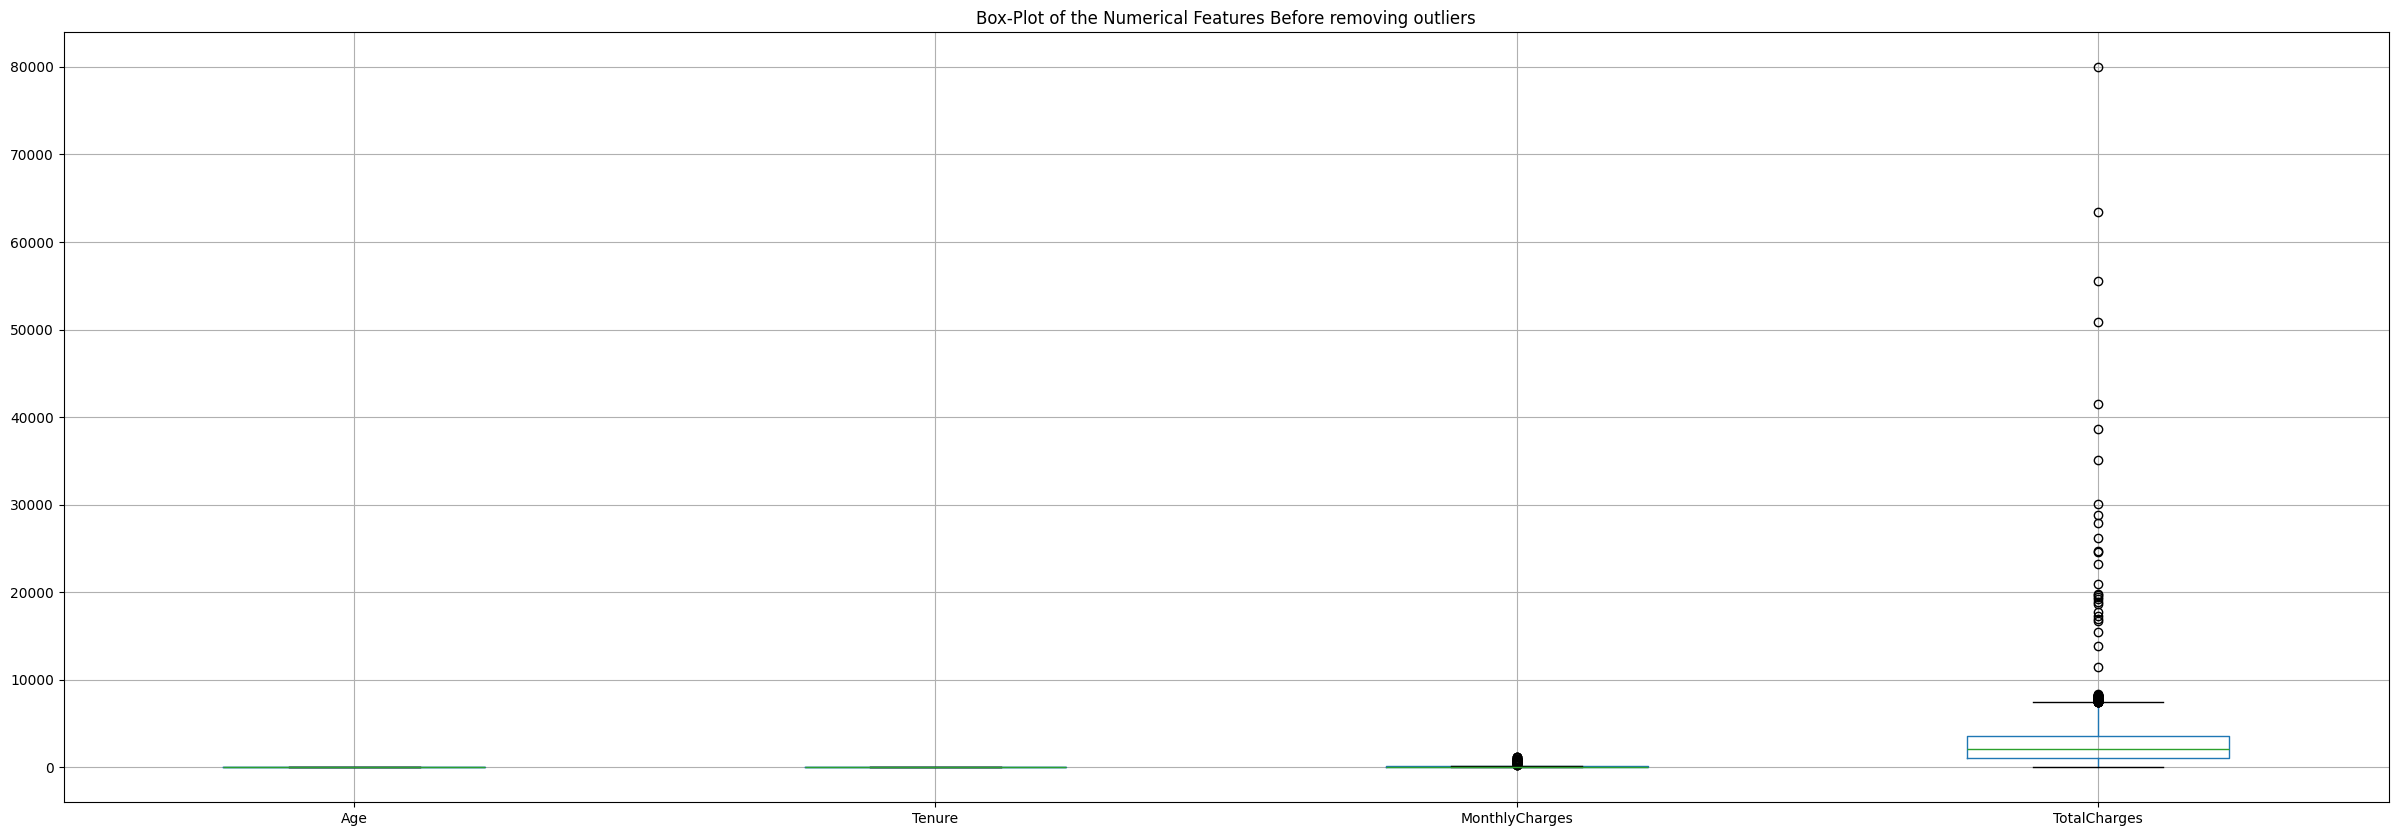

In [34]:
numerical_features = ['Age', 'Tenure', 'MonthlyCharges', 'TotalCharges']

# plot box-plot before detecting outliers
plt.figure(figsize=(30, 10))
plt.title('Box-Plot of the Numerical Features Before removing outliers')
data[numerical_features].boxplot(grid=True)
plt.show()

In [35]:
# Function to detect and clip outliers using IQR
def clip_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2 * IQR
    upper_bound = Q3 + 2 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    
# Apply clipping to numerical features
for feature in numerical_features:
    clip_outliers(data, feature)


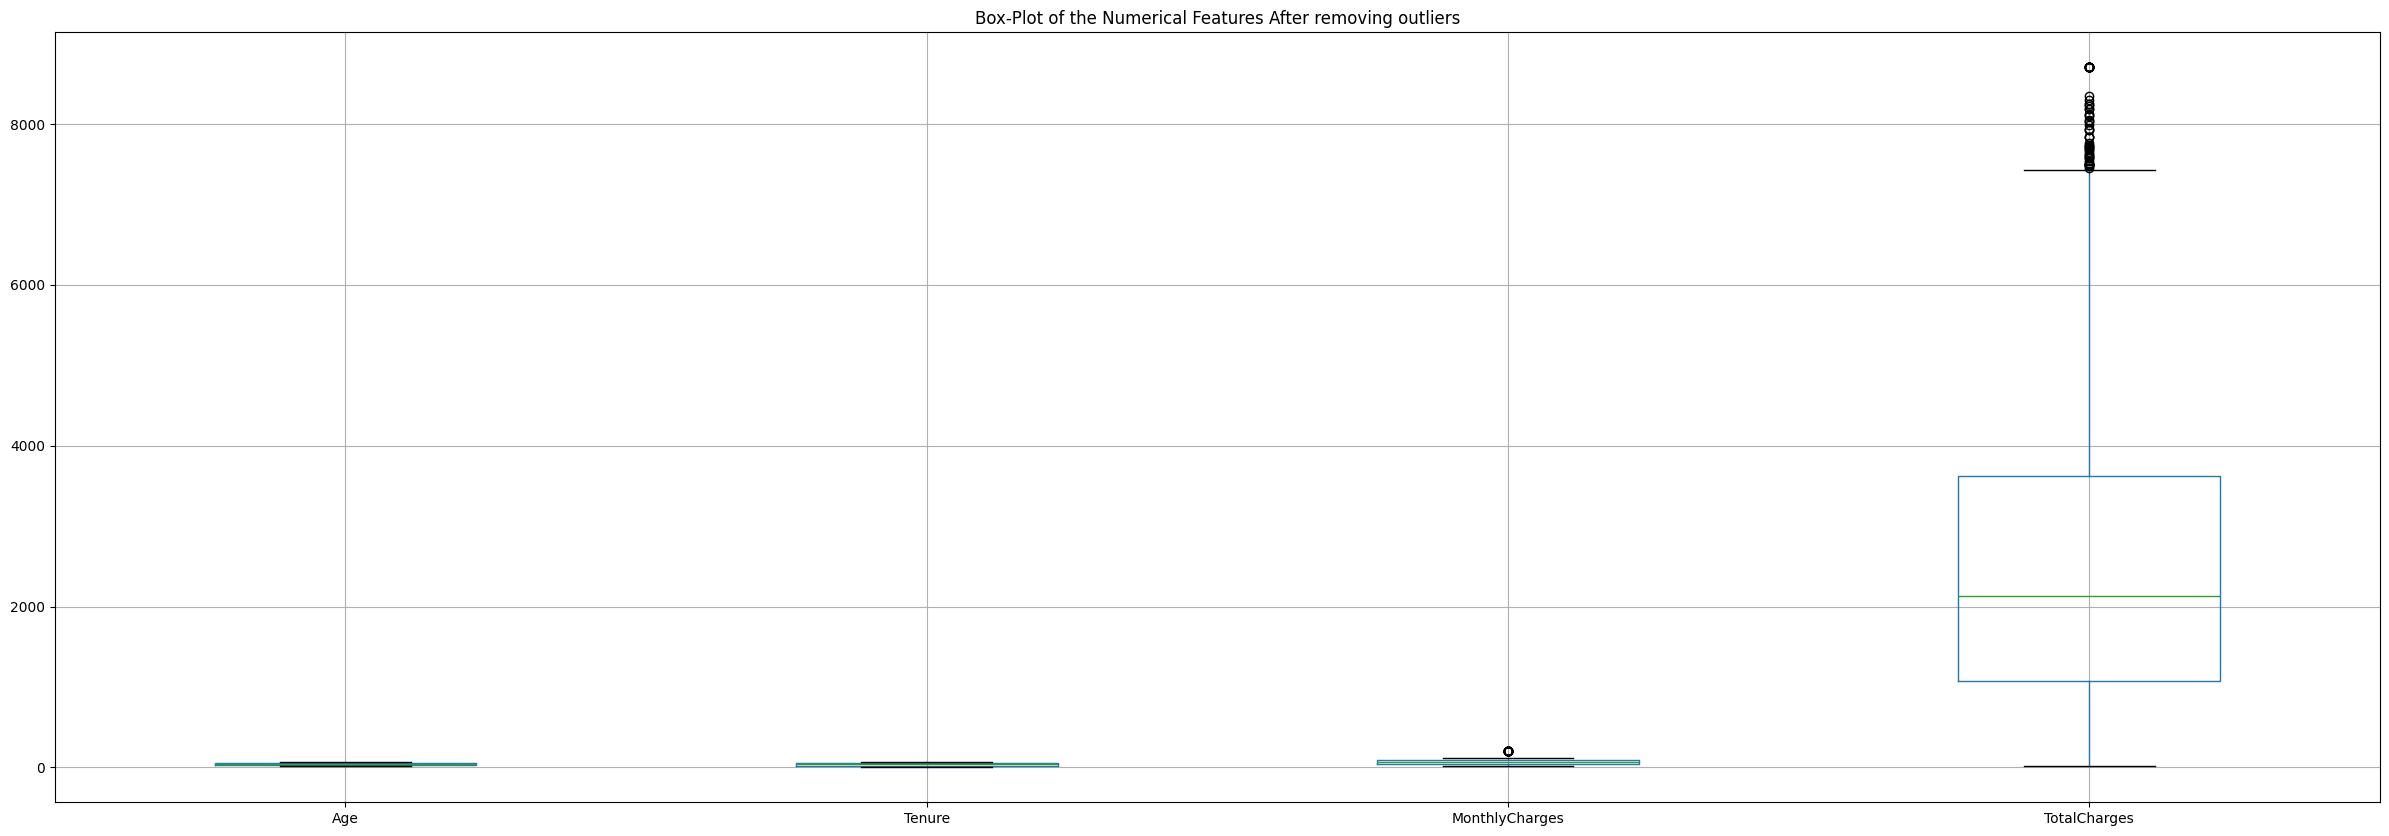

In [36]:
# plot box-plot after detecting outliers
plt.figure(figsize=(30, 10))
plt.title('Box-Plot of the Numerical Features After removing outliers')
data[numerical_features].boxplot(grid=True)
plt.show()

In [37]:
from sklearn.preprocessing import LabelEncoder

# One-hot encoding for nominal categorical features
cat_features = ['Gender', 'Service_Internet', 'Service_Phone', 'Service_TV', 'Contract', 'PaymentMethod', 'StreamingMovies', 'StreamingMusic', 'OnlineSecurity', 'TechSupport', 'Churn']

# Label encoding for binary categorical feature
label_encoder = LabelEncoder()
for feature in cat_features:
    data[feature] = label_encoder.fit_transform(data[feature])

# Display the first few rows of the encoded dataset
data.head()


,Age,Gender,Tenure,Service_Internet,Service_Phone,Service_TV,Contract,PaymentMethod,MonthlyCharges,TotalCharges,StreamingMovies,StreamingMusic,OnlineSecurity,TechSupport,Churn
0,56.0,1,13,0,1,0,1,3,71.88,931.49,0,0,1,0,0
1,69.0,1,13,0,0,1,2,3,110.99,1448.46,1,1,0,0,0
2,46.0,1,60,1,0,1,0,3,116.74,6997.73,1,1,0,0,0
3,32.0,0,57,1,1,1,0,0,78.16,4452.13,0,1,0,1,0
4,60.0,1,52,1,1,1,2,2,30.33,1569.73,1,0,1,1,0


In [38]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical features
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Display the first few rows of the scaled dataset
print(data.head())

# Verify no missing values remain
print(data.isnull().sum())


        Age  Gender    Tenure  Service_Internet  Service_Phone  Service_TV  \
0  0.848058       1 -1.134678                 0              1           0   
1  1.742395       1 -1.134678                 0              0           1   
2  0.160106       1  1.157693                 1              0           1   
3 -0.803026       0  1.011371                 1              1           1   
4  1.123239       1  0.767502                 1              1           1   

   Contract  PaymentMethod  MonthlyCharges  TotalCharges  StreamingMovies  \
0         1              3        0.030064     -0.854492                0   
1         2              3        1.276812     -0.585139                1   
2         0              3        1.460110      2.306154                1   
3         0              0        0.230257      0.979840                0   
4         2              2       -1.294467     -0.521955                1   

   StreamingMusic  OnlineSecurity  TechSupport  Churn  
0           

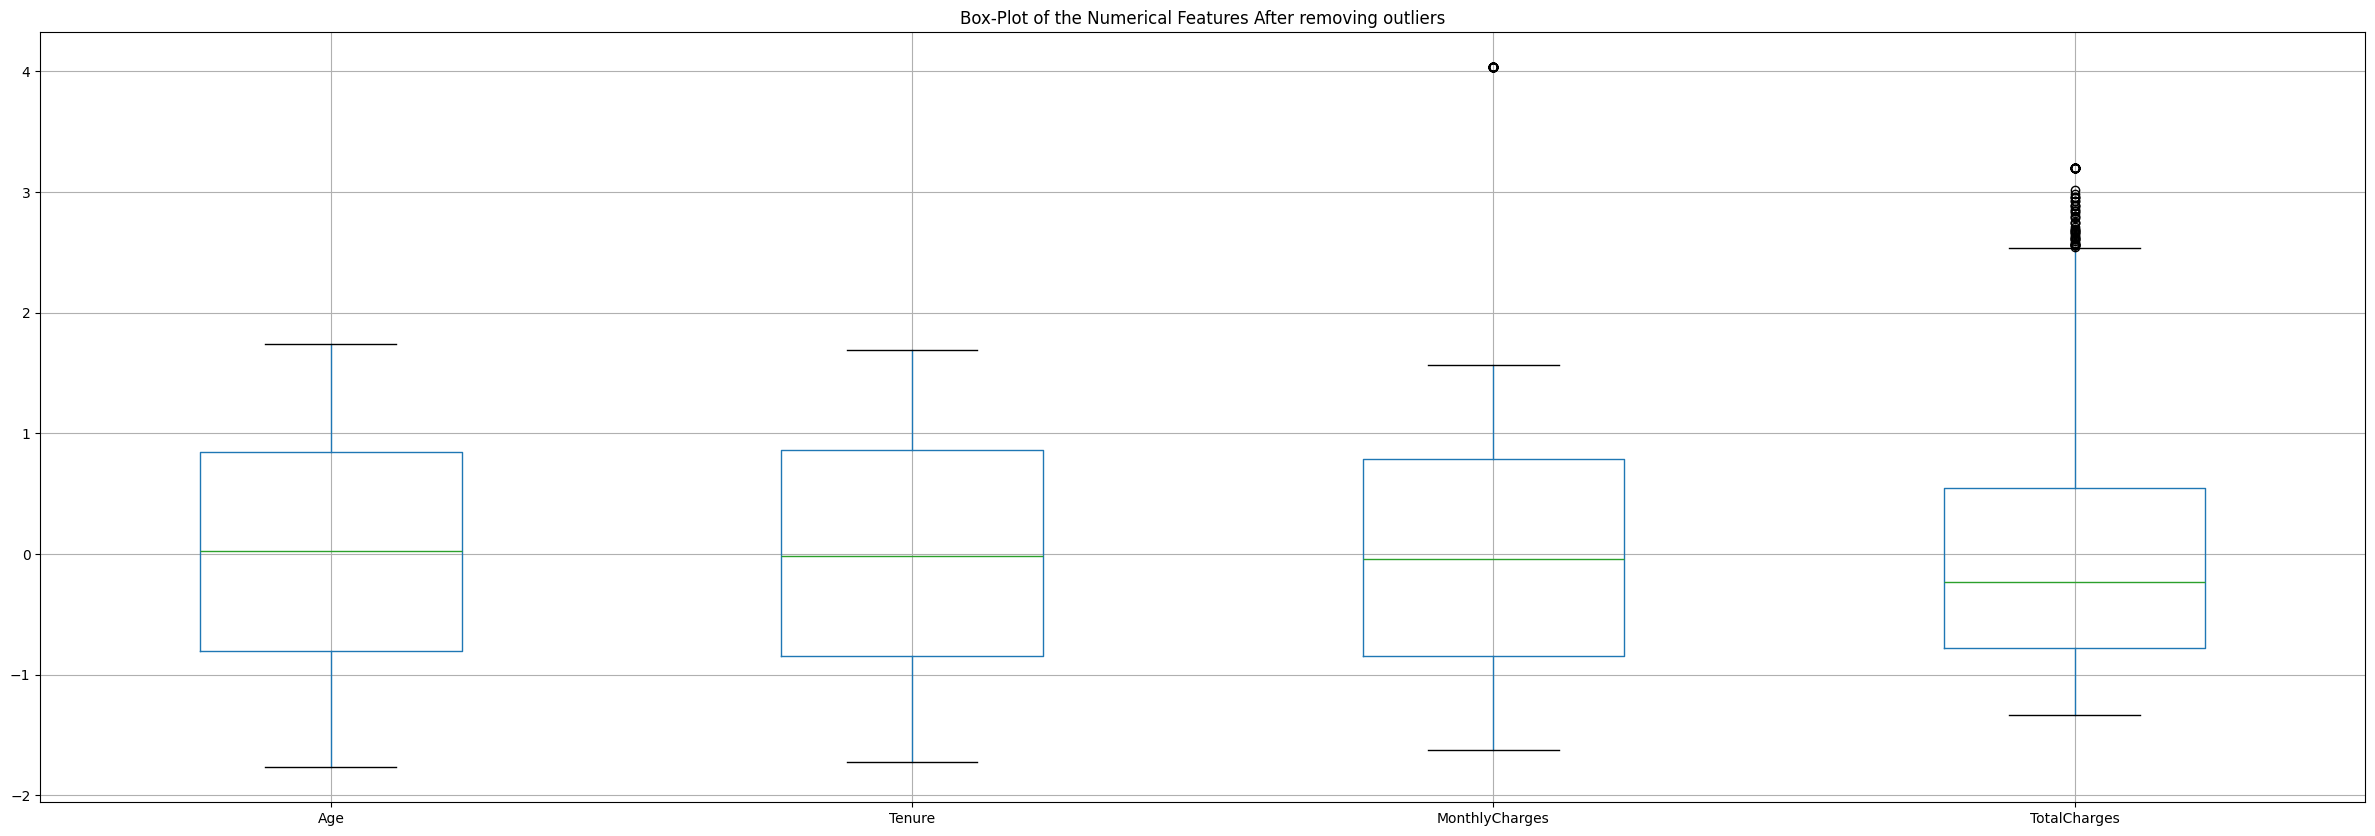

In [39]:
# plot box-plot
plt.figure(figsize=(30, 10))
plt.title('Box-Plot of the Numerical Features After removing outliers')
data[numerical_features].boxplot(grid=True)
plt.show()

# EDA ( Exploratory Data Analysis )

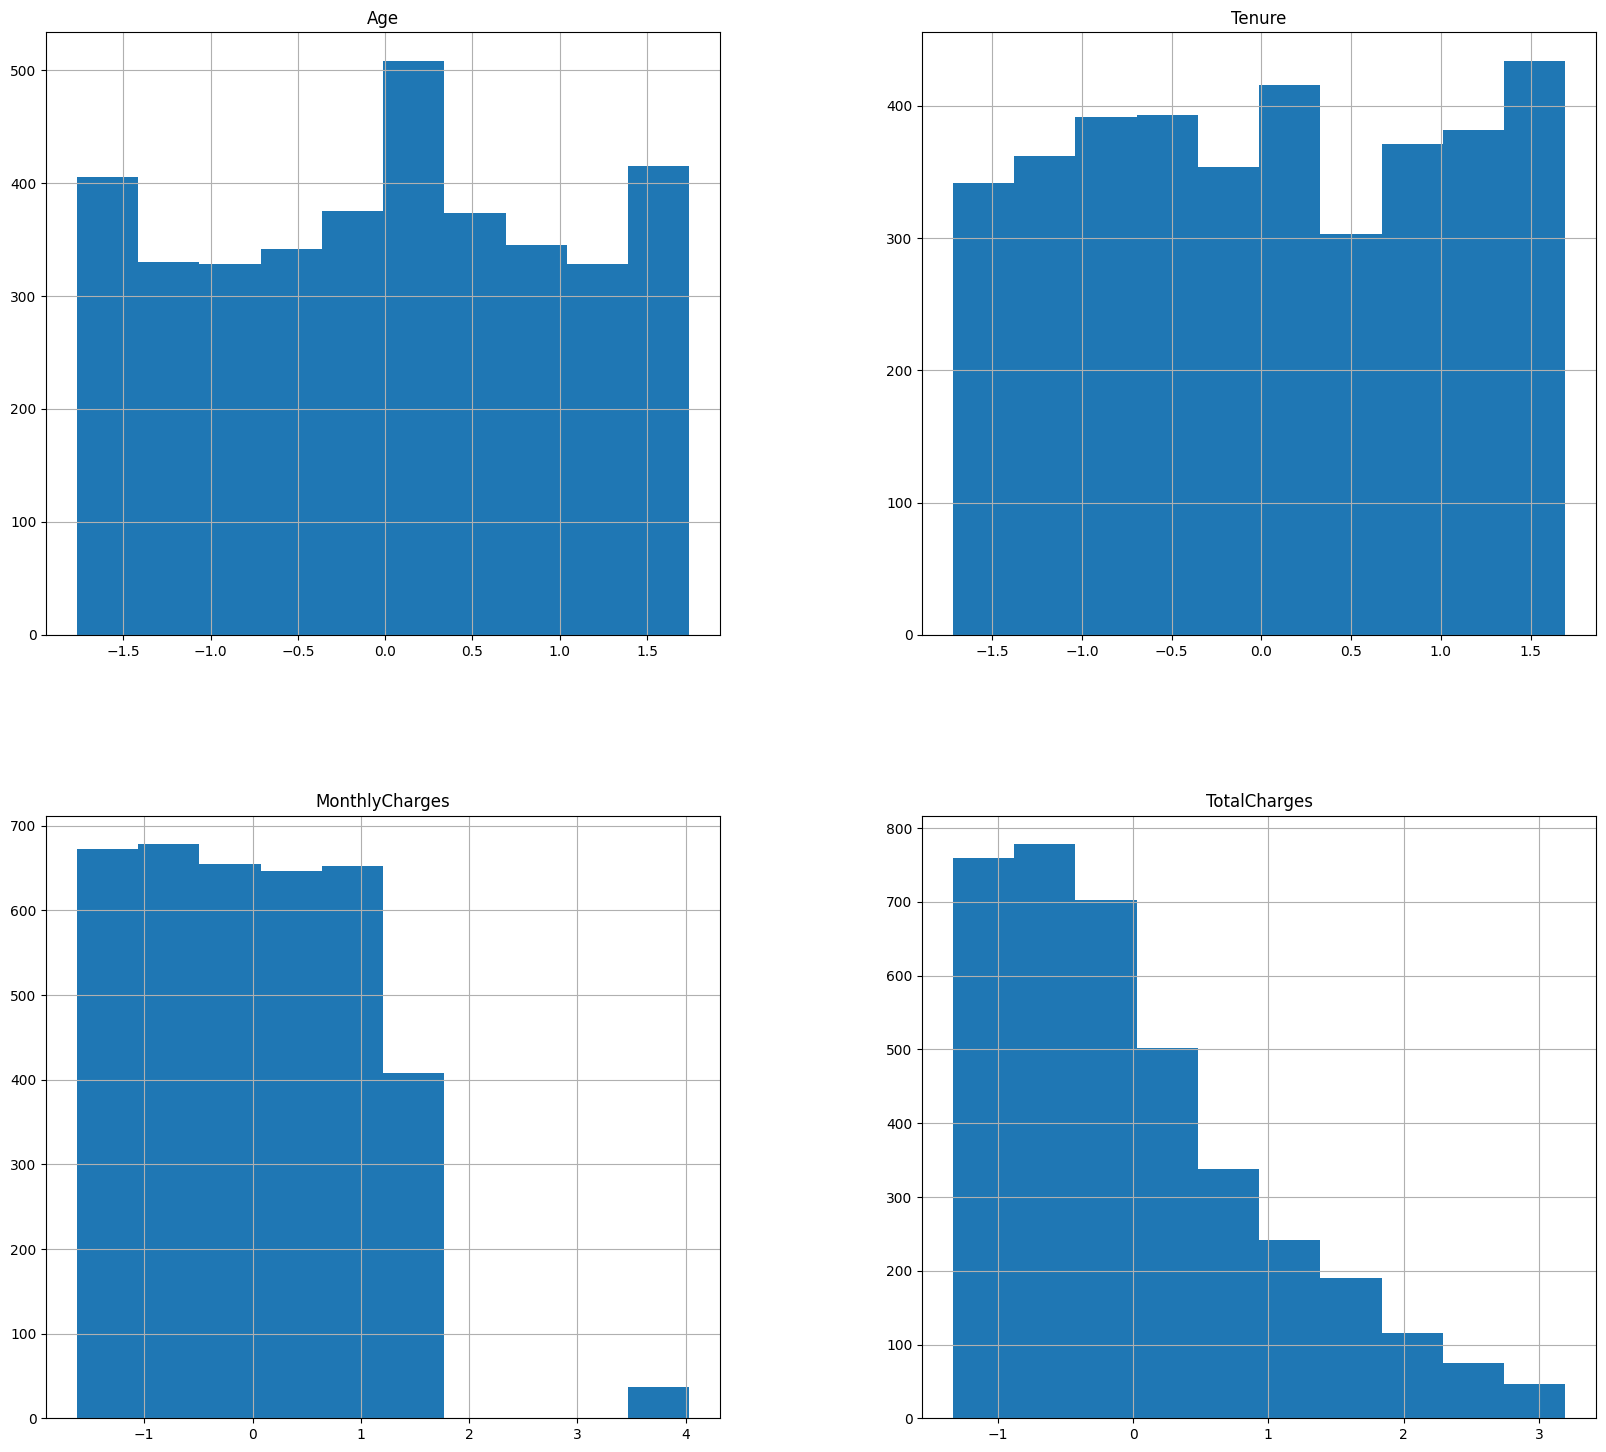

In [40]:
data[numerical_features].hist(figsize=(20,18))
plt.show()

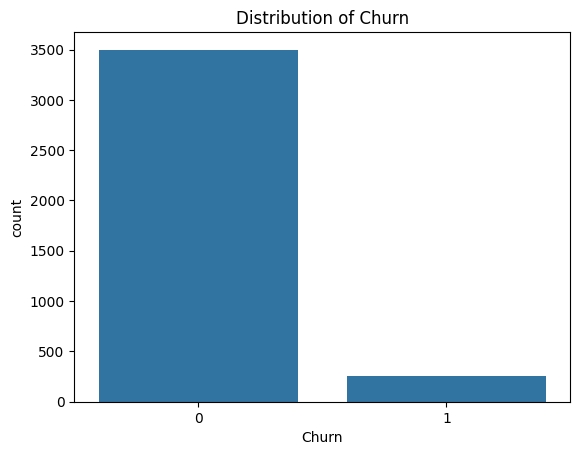

Churn
0    93.304881
1     6.695119
Name: proportion, dtype: float64


In [41]:
# Display the distribution of the target variable
sns.countplot(x='Churn', data=data)
plt.title('Distribution of Churn')
plt.show()

# Calculate the percentage of churn
churn_rate = data['Churn'].value_counts(normalize=True) * 100
print(churn_rate)


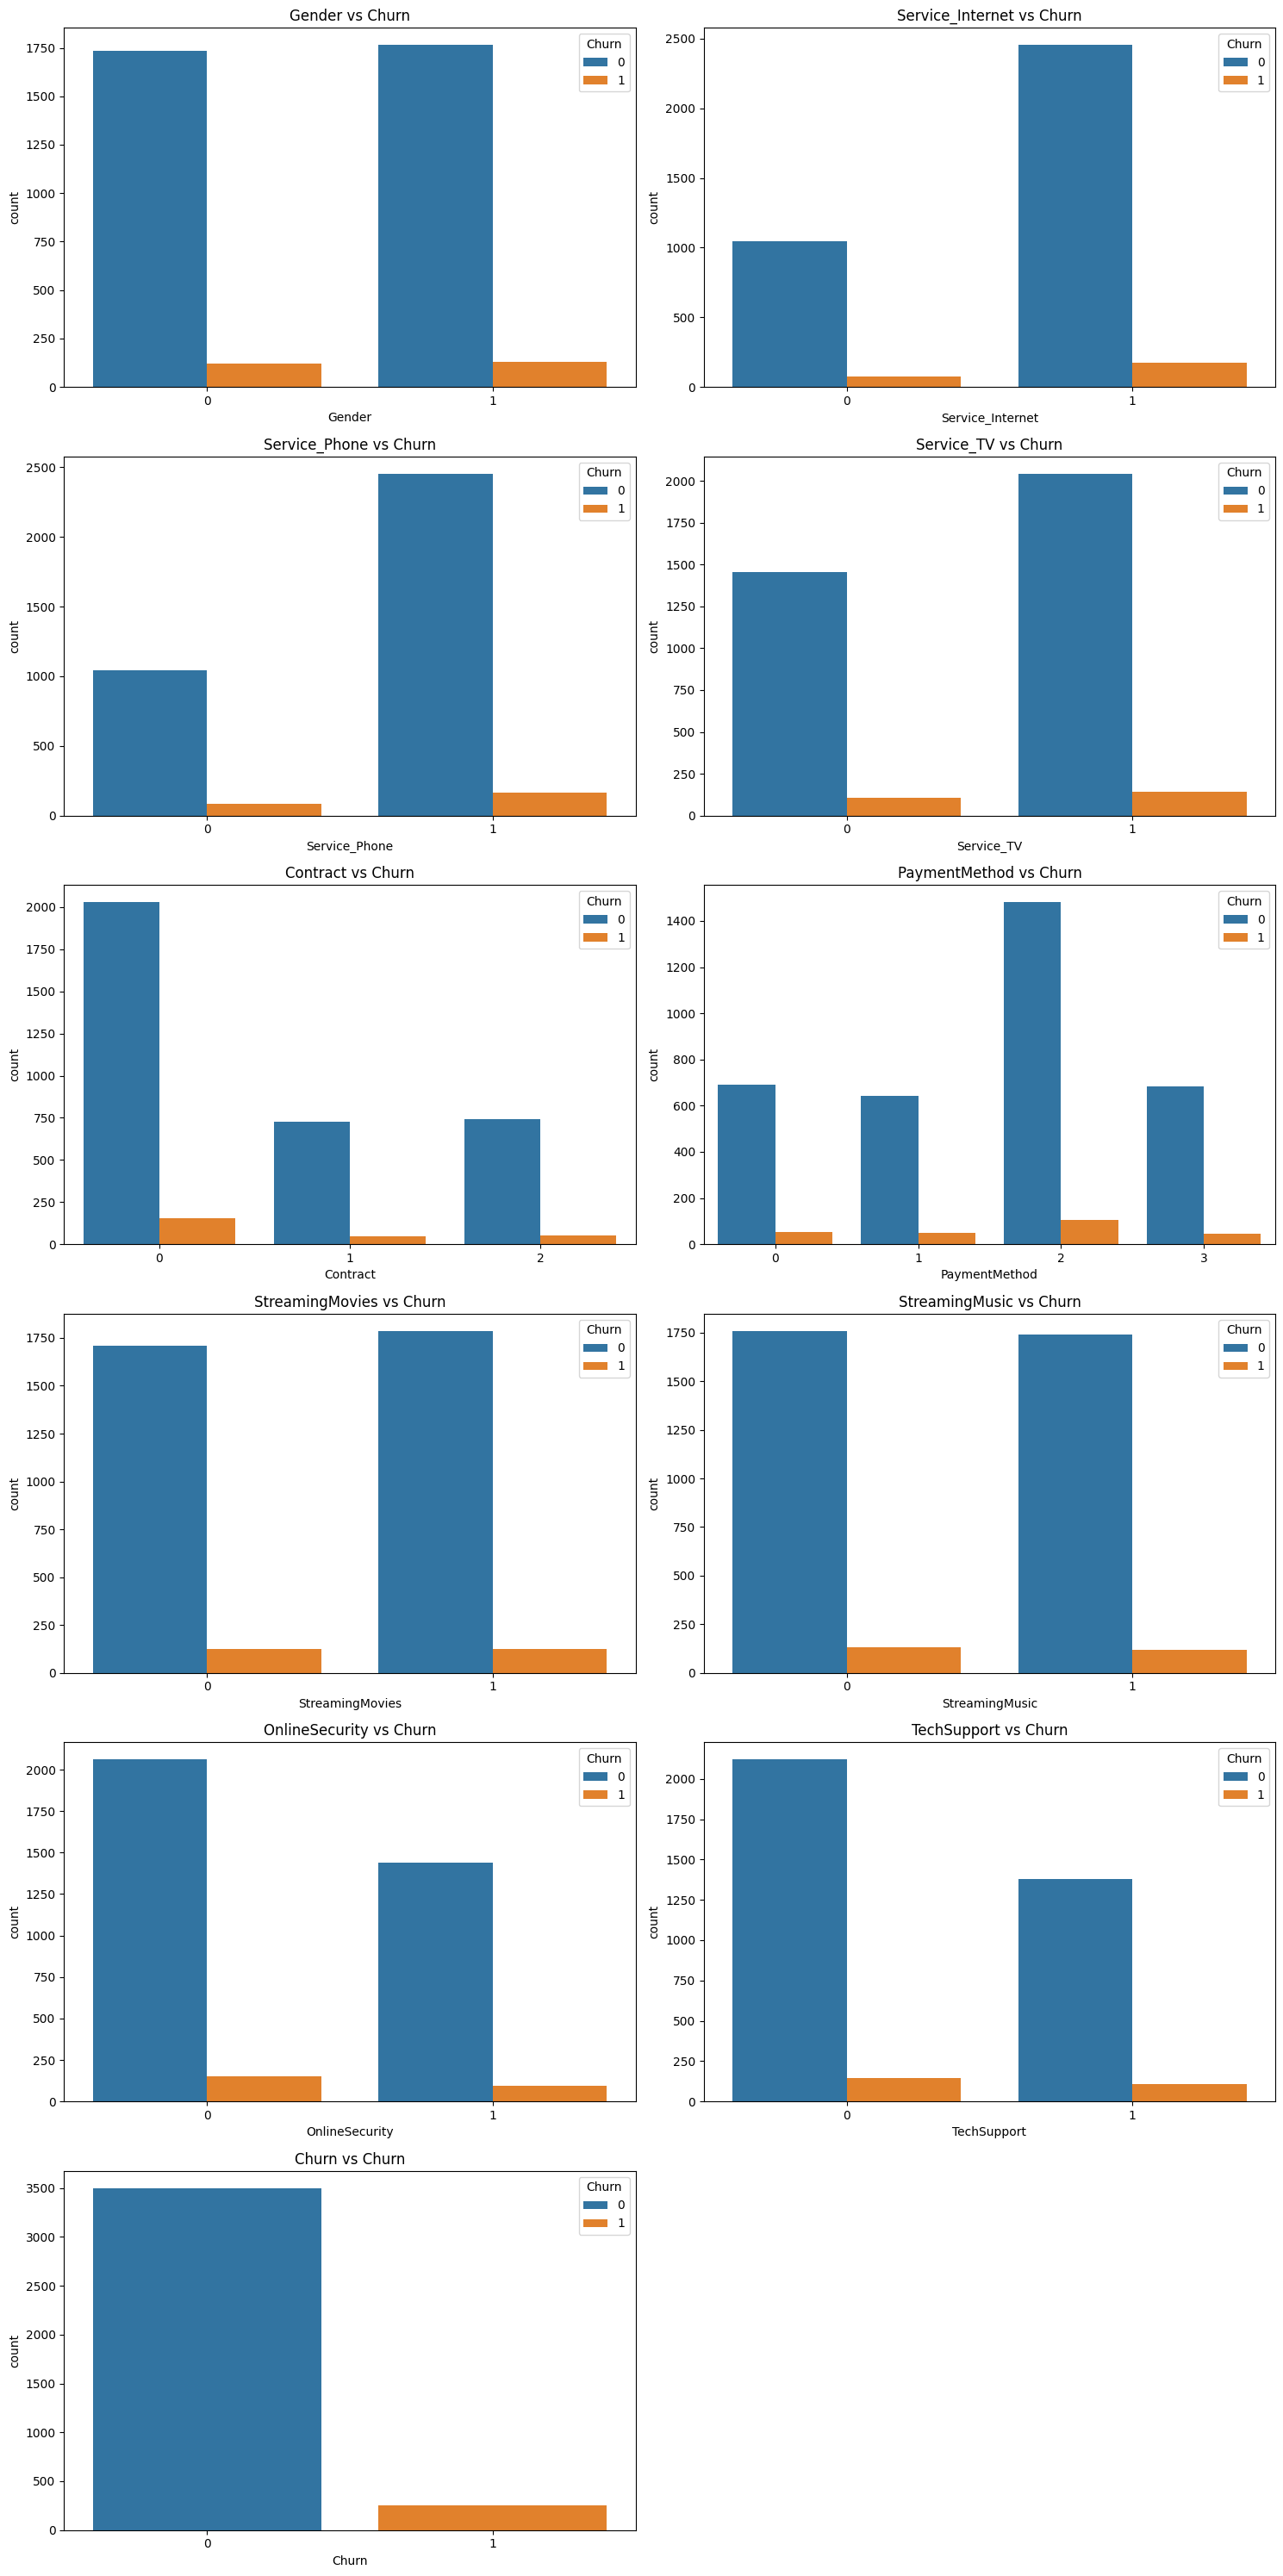

In [42]:
n_features = len(cat_features)
n_cols = 2
n_rows = (n_features + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

for i, feature in enumerate(cat_features):
    sns.countplot(x=feature, hue='Churn', data=data, ax=axes[i])
    axes[i].set_title(f'{feature} vs Churn')

# Remove any empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

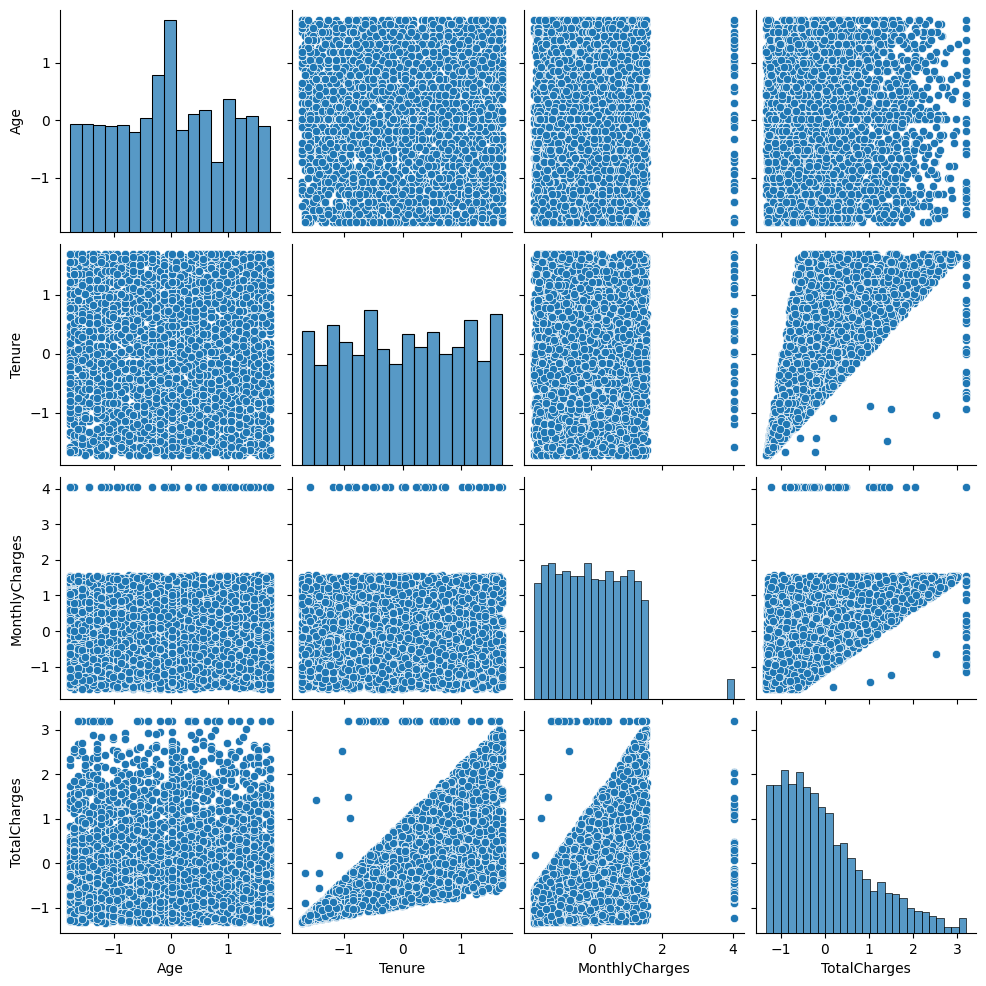

In [43]:
sns.pairplot(data[numerical_features])
plt.show()

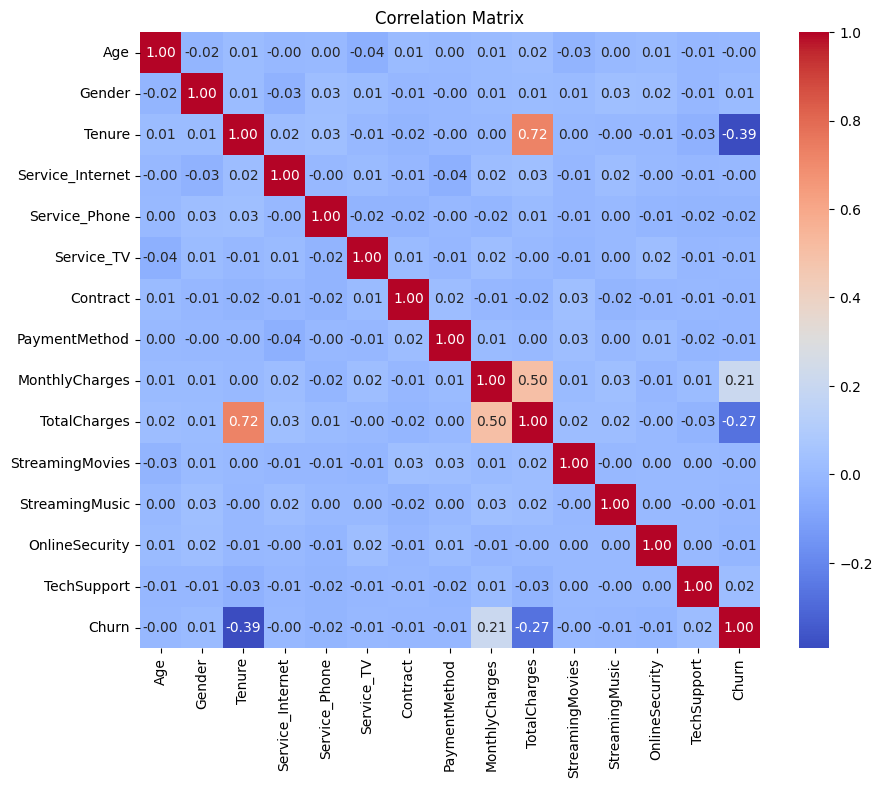

In [44]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()